In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier as DT
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
import glob
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + "Colab Notebooks/PDI/"

In [3]:


def media(norm):
    b=0
    for linha in norm:
        for elemento in linha:
            b=b+elemento

    return b/22500

def desvioP(norm,mediaColor):
    c=0
    for linha in norm:
        for element in linha:
            c = c + (((element - mediaColor)**2)/262144)
    c = c ** (1/2)
    return c

def uniformidade(norm):
    b=0
    for linha in norm:
        for element in linha:
             b=b+element**2
    return b


def entropia (norm):
    b=0
    for linha in norm:
        for element in linha:
            if element != 0:
                b = b + element*math.log2(element)
    b=b*-1
    return b

def tercM (norm,mediaC,dP):
    b=0
    for linha in norm:
        for element in linha:
            b = b + ((element-mediaC)/dP)**3
    b=b/256
    return b

In [4]:
  #declaramos variáveis

  medGrayList = []
  medRedList = []
  medGreenList = []
  medBlueList = []

  dpGrayList = []
  dpRedList = []
  dpGreenList = []
  dpBlueList = []

  unifC = []
  unifR = []
  unifG = []
  unifB = []

  tercMomentoC = []
  tercMomentoR = []
  tercMomentoG = []
  tercMomentoB = []

  entroC = []
  entroR = []
  entroG = []
  entroB = []

  label = []

In [5]:
for img in glob.glob(base_dir + "/maligno/*.tif"):
  image = io.imread(img)
  w, h = 150, 150;
  Matrix1 = [[0 for x in range(w)] for y in range(h)] 
  Matrix2 = [[0 for x in range(w)] for y in range(h)] 
  Matrix3 = [[0 for x in range(w)] for y in range(h)] 
  i=0
  j=0
  k=0
  for dimensao in image:
      i+=1
      j=0
      for linha in dimensao:
          j+=1
          k=0
          for element in linha:
              k+=1
              if k==1:
                  Matrix1[i-1][j-1]=element
              elif k==2:
                  Matrix2[i-1][j-1]=element
              elif k==3:
                  Matrix3[i-1][j-1]=element

  #após separadas as matrizes, serão todar normalizadas, para as aplicações estatísticas
  normR = Matrix1 / np.linalg.norm(Matrix1)
  normG = Matrix2 / np.linalg.norm(Matrix2)
  normB = Matrix3 / np.linalg.norm(Matrix3)

  gray=rgb2gray(image)
  normgray = gray / np.linalg.norm(gray)

  #neste bloco, média e desvio padrão ficam guardados para serem usados novamente posteriormente
  medGray = media(normgray)
  medRed = media(normR)
  medGreen = media(normG)
  medBlue = media(normB)

  dpGray = desvioP(normgray,medGray)
  dpRed = desvioP(normgray,medRed)
  dpGreen = desvioP(normgray,medGreen)
  dpBlue = desvioP(normgray,medBlue)
  
  
  
  medGrayList.append(medGray)
  medRedList.append(medRed)
  medGreenList.append(medGreen)
  medBlueList.append(medBlue)

  dpGrayList.append(dpGray)
  dpRedList.append(dpRed)
  dpGreenList.append(dpGreen)
  dpBlueList.append(dpBlue)

  unifC.append(uniformidade(normgray))
  unifR.append(uniformidade(normR))
  unifG.append(uniformidade(normG))
  unifB.append(uniformidade(normB))

  tercMomentoC.append(tercM(normgray,medGray,dpGray))
  tercMomentoR.append(tercM(normR,medRed,dpRed))
  tercMomentoG.append(tercM(normG,medGreen,dpGreen))
  tercMomentoB.append(tercM(normB,medBlue,dpBlue))


  entroC.append(entropia(normgray))
  entroR.append(entropia(normR))
  entroG.append(entropia(normG))
  entroB.append(entropia(normB))

  label.append(1) #1 é patológico

In [6]:
for img in glob.glob(base_dir + "/benigno/*.tif"):
  image = io.imread(img)
  w, h = 150, 150;
  Matrix1 = [[0 for x in range(w)] for y in range(h)] 
  Matrix2 = [[0 for x in range(w)] for y in range(h)] 
  Matrix3 = [[0 for x in range(w)] for y in range(h)] 
  i=0
  j=0
  k=0
  for dimensao in image:
      i+=1
      j=0
      for linha in dimensao:
          j+=1
          k=0
          for element in linha:
              k+=1
              if k==1:
                  Matrix1[i-1][j-1]=element
              elif k==2:
                  Matrix2[i-1][j-1]=element
              elif k==3:
                  Matrix3[i-1][j-1]=element

  #após separadas as matrizes, serão todar normalizadas, para as aplicações estatísticas
  normR = Matrix1 / np.linalg.norm(Matrix1)
  normG = Matrix2 / np.linalg.norm(Matrix2)
  normB = Matrix3 / np.linalg.norm(Matrix3)

  gray=rgb2gray(image)
  normgray = gray / np.linalg.norm(gray)

  #neste bloco, média e desvio padrão ficam guardados para serem usados novamente posteriormente
  medGray = media(normgray)
  medRed = media(normR)
  medGreen = media(normG)
  medBlue = media(normB)

  dpGray = desvioP(normgray,medGray)
  dpRed = desvioP(normgray,medRed)
  dpGreen = desvioP(normgray,medGreen)
  dpBlue = desvioP(normgray,medBlue)
  
  
  
  medGrayList.append(medGray)
  medRedList.append(medRed)
  medGreenList.append(medGreen)
  medBlueList.append(medBlue)

  dpGrayList.append(dpGray)
  dpRedList.append(dpRed)
  dpGreenList.append(dpGreen)
  dpBlueList.append(dpBlue)

  unifC.append(uniformidade(normgray))
  unifR.append(uniformidade(normR))
  unifG.append(uniformidade(normG))
  unifB.append(uniformidade(normB))

  tercMomentoC.append(tercM(normgray,medGray,dpGray))
  tercMomentoR.append(tercM(normR,medRed,dpRed))
  tercMomentoG.append(tercM(normG,medGreen,dpGreen))
  tercMomentoB.append(tercM(normB,medBlue,dpBlue))

  entroC.append(entropia(normgray))
  entroR.append(entropia(normR))
  entroG.append(entropia(normG))
  entroB.append(entropia(normB))

  label.append(0) #0 é saudável

In [7]:

TRAIN = np.concatenate([(label,
  medGrayList ,
  medRedList ,
  medGreenList ,
  medBlueList ,

  dpGrayList ,
  dpRedList ,
  dpGreenList ,
  dpBlueList ,

  unifC ,
  unifR ,
  unifG ,
  unifB ,

  tercMomentoC ,
  tercMomentoR ,
  tercMomentoG ,
  tercMomentoB ,

  entroC ,
  entroR ,
  entroG ,
  entroB)])

TRAIN = np.transpose(TRAIN)

X = TRAIN[:, 1:]
Y = TRAIN[:, 0]

X = StandardScaler().fit_transform(X) #normaliza features.


SVC = LinearSVC()
DTlf = DT() #DecisionTree Classifier

scoresSVC = cross_val_score(SVC, X, Y, cv=5, scoring="accuracy")
scoresDT = cross_val_score(DTlf, X, Y, cv=5, scoring="accuracy")

print("Scores SVC: ", scoresSVC)
print("Scores DT: ", scoresDT)

Scores SVC:  [1. 1. 1. 1. 1.]
Scores DT:  [1. 1. 1. 1. 1.]


**[SELEÇÃO DE CARACTERÍSTICAS] -** Aqui analisaremos três métodos distintos para seleção de características, sendo dois já bem conhecido (Importância de Características e seleção univariada), e outro sendo novidade, baseado no uso de lógica paraconsistente.

**[SELEÇÂO PARACONSISTENTE]**

In [8]:
"""
This is the python version for using the Paraconsistent Analysis.
For a feature vector of length n, the function ParaconsistentAnalysis()
calculates every possible combination of features from n, and then returns
the best possible vector, that is, the set of features closest to P(1,0) in the Paraconsistent plane.
For more info, see the article from Guido, R.C; "Paraconsistent feature engineering", 
IEEE Signal Process Mag., vol. 36, no. 1, pp. 154-158, 2019
"""

#mean_similarities(double**,int,int);#vectors, of vectors, dimension

import numpy as np
import copy
from copy import deepcopy


def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)


def mean_similarities(v, n, t):
    s = []
    for i in range(t):
    	smallest=1
    	largest=0
    	for j in range(n):
    		if v[j][i]>largest:
    			largest=v[j][i]
    		if v[j][i]<smallest:
    			smallest=v[j][i]
    	s.append(1-(largest-smallest) )
    
    m=0
    for i in range(t):
    	m+=s[i]
    m/=((float)(t))	#np..float64 ? Mais precisão		
    
    return m



def ParaconsistentAnalysis(number_of_classes, \
    number_of_feature_vectors_in_class, dimension_of_each_feature_vector, c, verbose = False):

    '''
    Example of usage: (IMPORTANT: array c MUST BE FLATTENED OR RESHAPED TO (1, -1))
    
    number_of_classes=3
    number_of_feature_vectors_in_class = [0] * number_of_classes #syntax for list init
    number_of_feature_vectors_in_class[0]=4
    number_of_feature_vectors_in_class[1]=4 
    number_of_feature_vectors_in_class[2]=4	
    
    dimension_of_each_feature_vector=2
    
    Example: 3 classes and 4 vectors of dimension 2 in each class
    {{0.90,0.12},{0.88,0.14},{0.88,0.13},{0.89,0.11}}   #0.88---0.90 ; 0.11---0.14
    {{0.55,0.53},{0.53,0.55},{0.54,0.54},{0.56,0.54}}   #0.53---0.56 ; 0.53---0.55
    {{0.10,0.88},{0.11,0.86},{0.12,0.87},{0.11,0.88}}   #0.10---0.12 ; 0.86---0.88	 
    
    c = [\
    0.90,0.12,0.88,0.14,0.88,0.13,0.89,0.11, \
    0.55,0.53,0.53,0.55,0.54,0.54,0.56,0.54, \
    0.10,0.88,0.11,0.86,0.12,0.87,0.11,0.88]
    
    '''
    #all vectors in class C_1, by all vectors in C_2, ...., by all in C_n
    
    ##############################################			
    #edit whatever you need, to the feature vectors of your problem, self line.
    #Do NOT change anything BELOW self line not !not !not 	
    ##############################################	
    
    
    #######
    C = []
    
    for i in range(number_of_classes):
        C.append([])
        C[i] = [[]]*number_of_feature_vectors_in_class[i]
    
    for i in range(number_of_classes):
        for j in range(number_of_feature_vectors_in_class[i]):
            C[i][j] = [[]] * dimension_of_each_feature_vector
    l=0
    for i in range(number_of_classes):
    	for j in range(number_of_feature_vectors_in_class[i]):
    	    for k in range(dimension_of_each_feature_vector):
    		    C[i][j][k]=c[l]
    		    l += 1
    
    #Debug info only
    #for(int i=0;i<number_of_classes;i++)
    #	for(int j=0;j<number_of_feature_vectors_in_class[i];j++)
    #		for(int k=0;k<dimension_of_each_feature_vector;k++)
    #			printf("class %d vector %d element %d is %.3f",i,j,k,C[i][j][k])
    
    Y = [0]*number_of_classes
    for i in range(number_of_classes):
    	Y[i] = mean_similarities(C[i],number_of_feature_vectors_in_class[i],dimension_of_each_feature_vector)
    alpha=Y[0]
    for i in range(number_of_classes):
    	if Y[i]<alpha:
    		alpha=Y[i]
    #print("\nALPHA: %.3f",alpha)
    smallest_range_vector_for_class = []
    for i in range(number_of_classes):
        smallest_range_vector_for_class.append([])
        smallest_range_vector_for_class[i] = [[]] * dimension_of_each_feature_vector
    
    for i in range(number_of_classes):
    	for k in range(dimension_of_each_feature_vector):
    	    smallest_range_vector_for_class[i][k]=C[i][0][k] # i k
    for i in range(number_of_classes):
        for j in range(1, number_of_feature_vectors_in_class[i]):
            for k in range(dimension_of_each_feature_vector):
                if(C[i][j][k]<smallest_range_vector_for_class[i][k]):	
                    smallest_range_vector_for_class[i][k]=C[i][j][k]
    #Debug info only
    #for(int i=0;i<number_of_classes;i++)
    #	for(int k=0;k<dimension_of_each_feature_vector;k++)
    #			print("class %d smallest component %d is %.3f",i,k,smallest_range_vector_for_class[i][k])
    
    largest_range_vector_for_class = []
    
    for i in range(number_of_classes):
        largest_range_vector_for_class.append([])
        largest_range_vector_for_class[i] = [[]] * dimension_of_each_feature_vector
    
    for i in range(number_of_classes):
    	for k in range(dimension_of_each_feature_vector):
    		largest_range_vector_for_class[i][k]=C[i][0][k]
    for i in range(number_of_classes):
        for j in range(1, number_of_feature_vectors_in_class[i]):
    	    for k in range(dimension_of_each_feature_vector):
    		    if(C[i][j][k]>largest_range_vector_for_class[i][k]):	
    			    largest_range_vector_for_class[i][k]=C[i][j][k]
    
    #Debug info only
    #for(int i=0;i<number_of_classes;i++)
    #	for(int k=0;k<dimension_of_each_feature_vector;k++)
    #			print("class %d largest component %d is %.3f",i,k,largest_range_vector_for_class[i][k]);		
    R=0
    F=0
    for ia in range(number_of_classes):
    	for ib in range(number_of_classes):
    		for j in range(number_of_feature_vectors_in_class[ib]):
    			for k in range(dimension_of_each_feature_vector):
    				if ib!=ia:
    					if (C[ib][j][k]>smallest_range_vector_for_class[ia][k])and(C[ib][j][k]<largest_range_vector_for_class[ia][k]):
    						R += 1
    					F += 1
    
    
    
    
    
    beta=((float)(R))/((float)(F)) #np.float(64) ? Maior prec
    if verbose == True:  
        print("ALPHA: {0:.3f}".format(alpha))
        print("BETA: {0:.3f}".format(beta))
        print("P=(G1,G2)=({0:.3f},{0:.3f})".format(alpha-beta,alpha+beta-1))
        print("Distance from P to (1,0): {0:.3f}".format(np.sqrt(pow((alpha-beta)-1,2)+pow(alpha+beta-1,2)))  )
        print("############")
    
    dist = np.sqrt(pow((alpha-beta)-1,2)+pow(alpha+beta-1,2)) 
    xAxis[dimension_of_each_feature_vector - 1].append(dist)
    return dist

######################/
######################

######################/
######################



def BestParaconsistent(number_of_classes, number_of_feature_vectors_in_class,\
dimension_of_each_feature_vector, c, verbose = False):

    featuresIndex = [Y for Y in range(dimension_of_each_feature_vector)] #representa o índice
    #de cada característica no vetor de carac.
    bestIndex = [] #as melhores carac. selecionadas
    bestDist = 2 # melhor distancia correspondente ao conjunto dos
    # melhores índices começa em mais infinito.
    for a in range(dimension_of_each_feature_vector):
        old = copy.deepcopy(bestIndex)
        for i in featuresIndex:
            if len(bestIndex) == 0 or a == 0: #se lista ainda vazia, ou ainda é a primeira passada
                #doSomething
                newC = []
                number_of_feature_vectors_in_class_AUX = [1] * number_of_classes
                count = 0
                for j in range(len(c)):
                    if j % dimension_of_each_feature_vector == i:
                        newC.append(c[j])
                dist = ParaconsistentAnalysis(number_of_classes, number_of_feature_vectors_in_class, 1, newC, verbose)
                if dist < bestDist:
                    bestDist = dist
                    if len(bestIndex) == 0:
                        bestIndex.append(i)
                    else:
                        bestIndex.pop()
                        bestIndex.append(i)
            else:
                if i not in bestIndex:
                    bestIndex.append(i) #temporariamente
                    newC = []
                    for j in range(len(c)):
                        if (j % dimension_of_each_feature_vector) in bestIndex:
                            newC.append(c[j])
                    dist = ParaconsistentAnalysis(number_of_classes, number_of_feature_vectors_in_class, len(bestIndex), newC, verbose)
                    bestIndex.remove(i) #retira o ultimo elemento colocado
                    if dist < bestDist and old == bestIndex:
                        bestDist = dist
                        bestIndex.append(i)
                    elif dist < bestDist and old != bestIndex:
                        bestDist = dist
                        bestIndex.pop()
                        bestIndex.append(i)
        bestIndex.sort()


    return bestIndex, bestDist
    



xAxis = [[] for i in range(20)]
BestsIndexes = []
BestsDists = []
number_of_classes=2
number_of_feature_vectors_in_class = [0] * number_of_classes #syntax for list init
number_of_feature_vectors_in_class[0]=(Y == 0).sum() #saudável
number_of_feature_vectors_in_class[1]=(Y == 1).sum() #patológico
    
dimension_of_each_feature_vector=20
X[:, :] -= np.min(X[:, :], axis=0) #Scaling
X[:, :] /= np.max(X[:, :], axis=0)

c = X[:, :].flatten()
print(BestParaconsistent(number_of_classes, number_of_feature_vectors_in_class,\
dimension_of_each_feature_vector, c, verbose=False) )


([13], 0.6479080783581922)


Logo, podemos ver que através da seleção por lógica paraconsistente, a melhor característica foi a de índice 13 - correspondente ao terceiro momento do canal R!

**[SELEÇÃO UNIVARIADA] - considerando teste de qui-quadrado** 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

XDataFrame = pd.DataFrame(TRAIN[:, 1:], columns=[
  'media Cinza' ,
  'media R' ,
  'media G' ,
  'media B' ,

  'desvio p. Cinza' ,
  'desvio p. R' ,
  'desvio p. G' ,
  'desvio p. B' ,

  'unif. Cinza' ,
  'unif. R' ,
  'unif. G' ,
  'unif. B' ,

  'terc. momento Cinza' ,
  'terc. momento R' ,
  'terc. momento G' ,
  'terc. momento B' ,

  'entropia Cinza' ,
  'entropia R' ,
  'entropia G' ,
  'entropia B'])


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

featureScoresDF = pd.DataFrame(fit.scores_)
XColumns = pd.DataFrame(XDataFrame.columns)
concatDF = pd.concat([XColumns, featureScoresDF], axis=1)

concatDF.columns = ['Caracterísitca', 'Score']

print(concatDF.nlargest(10,'Score'))  #print 10 best features

         Caracterísitca     Score
13      terc. momento R  5.236972
7           desvio p. B  3.830504
6           desvio p. G  3.739398
4       desvio p. Cinza  3.736504
5           desvio p. R  3.691997
12  terc. momento Cinza  3.050248
1               media R  2.938575
17           entropia R  2.905815
2               media G  2.375020
18           entropia G  2.197970


**Importante notar que tanto pela seleção univariada através do qui-quadrado quanto pelos testes de lógica paraconsistente, a melhor característica em ambos foi o terceiro momento do canal R.**

**O que acontece se pegarmos nossos modelos com apenas as 10 características mais relevantes pelo teste de qui-quadrado?**

In [25]:
X = TRAIN[:, (13, 7, 6, 4, 5, 12, 1, 17, 2, 18)]

X = StandardScaler().fit_transform(X) #normaliza features.

SVC = LinearSVC()
DTlf = DT() #DecisionTree Classifier



scoresSVC = cross_val_score(SVC, X, Y, cv=5, scoring="accuracy")
scoresDT = cross_val_score(DTlf, X, Y, cv=5, scoring="accuracy")

print("Scores SVC: ", scoresSVC)
print("Scores DT: ", scoresDT)

Scores SVC:  [1.    1.    1.    0.875 1.   ]
Scores DT:  [1. 1. 1. 1. 1.]


Como podemos ver, as acurácias continuaram excelentes, batendo em quase todas as etapas da validação cruzada, **100%**, enquanto conseguimos reduzir a dimensionalidade do problema.

**[Feature Importance]** 

[0.06479464 0.11588434 0.03251666 0.02694279 0.04122261 0.06076616
 0.04704457 0.07450659 0.         0.         0.         0.
 0.06998838 0.13575057 0.03091804 0.00925848 0.07060804 0.17683694
 0.02563939 0.01732181]


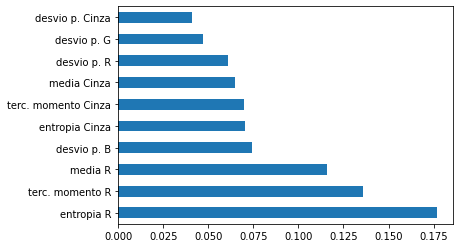

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(XDataFrame,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=XDataFrame.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Aqui, vemos que o terceiro momento do canal R é a segunda característica mais relevante, o que continua condizendo com os resultados obtidos anteriormente. Outro padrão que podemos perceber é que as 3 características mais importantes são todas relacionadas ao canal vermelho

**[Bônus] - Mapa de calor entre as características considerando o critério de correlação de Pearson.**

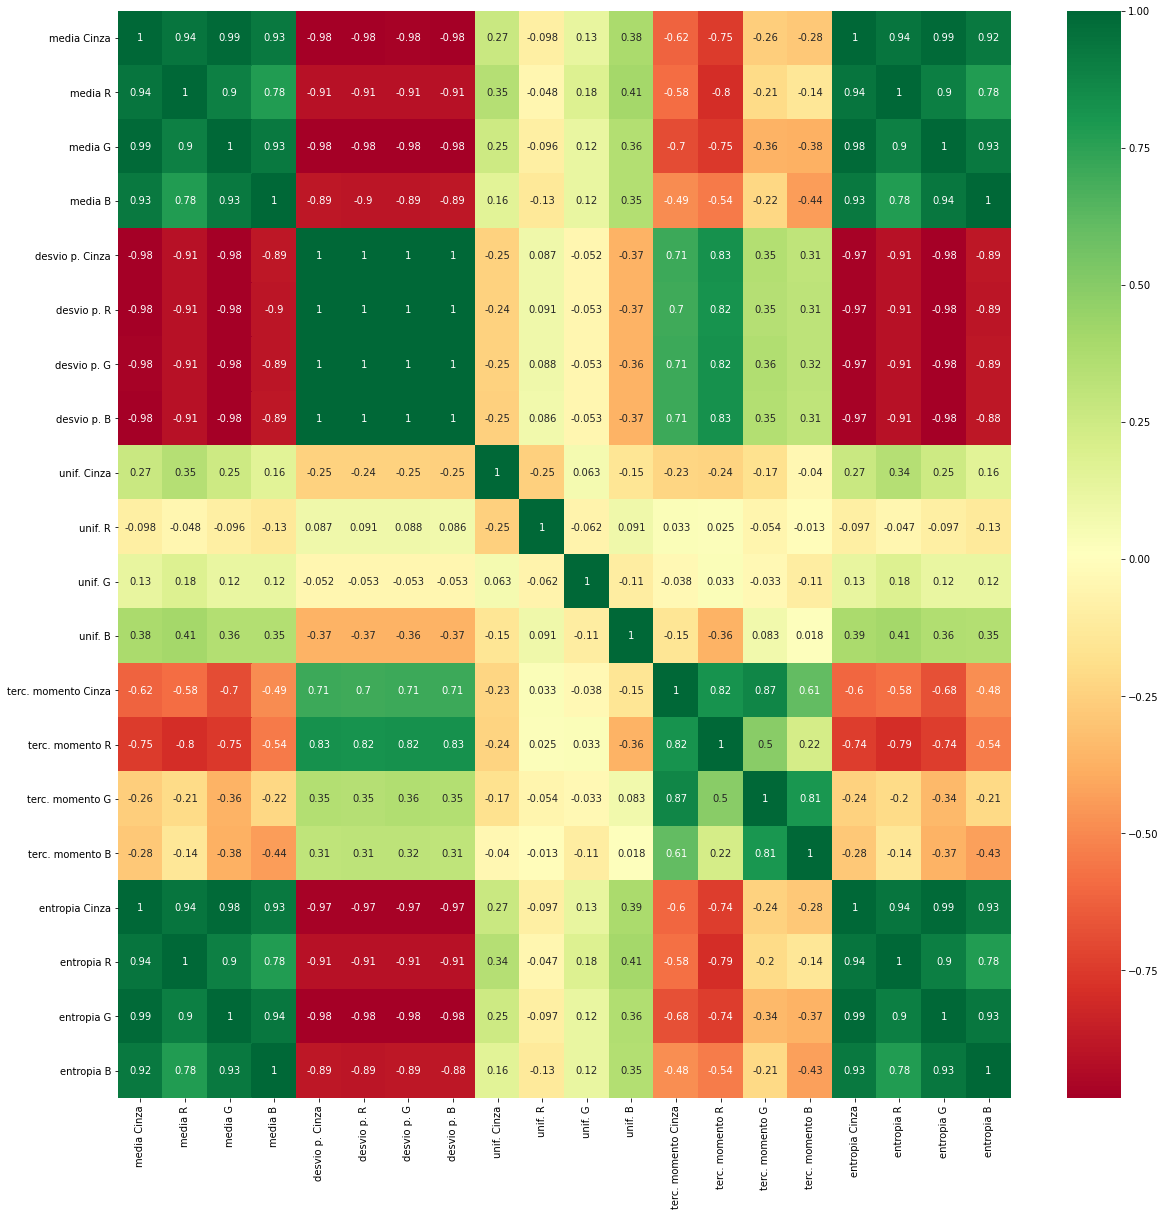

In [27]:
import seaborn as sns #pacote para visualizaão dos dados

corrmat = XDataFrame.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(XDataFrame[top_corr_features].corr(),annot=True,cmap="RdYlGn")